<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_sac_training_walkforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fix Potential Library Conflicts
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [2]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 11.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.


In [3]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,704 kB]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy/main amd64 Packages [47.4 kB]
Get:13 ht

In [4]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [5]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [6]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 205.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 73.9 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [7]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlin

In [8]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Immediately follow it with:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


TensorFlow GPU memory growth enabled


In [9]:
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv

#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv

#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}

def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#Feature Engineering Function
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df['Buy_Signal'] = np.where((df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
                                ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
                                (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18), 1, 0)
    df['Sell_Signal'] = np.where(((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
                                 ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
                                 (df['Close'] < df['Trailing_Stop']) |
                                 ((df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20)), 1, 0)
    df['Sell_Signal_Debug'] = np.where(((df['MACD_Hist'] < 0.5) | (df['MACD_Line'] < df['MACD_Signal'])) &
                                       (df['RSI'] < 55) & (df['ADX'] > 15) &
                                       ((df['Close'] < df['Trailing_Stop']) | (df['EMA_10'] < df['EMA_50'])) &
                                       (df['Volume'] > 0.5 * df['Volume_Avg']), 1, 0)
    df['Future_Close'] = df['Close'].shift(-10)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Multi_Class_Target'] = df['Target']
    df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['Datetime']).dt.dayofweek
    df['Session'] = np.where((df['Hour'] >= 9) & (df['Hour'] <= 16), 'Regular',
                             np.where((df['Hour'] < 9), 'Pre-market', 'After-hours'))
    df['MACD_Crossover'] = np.where(df['MACD_Line'] > df['MACD_Signal'], 1, 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

all_dfs = []

for ticker in ticker_list:
    df_single = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_single is not None:
        try:
            df_features = compute_enhanced_features(df_single)
            all_dfs.append(df_features)
        except Exception as e:
            print(f"Feature engineering failed for {ticker}: {e}")
    else:
        print(f"Failed to download {ticker}")

if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined dataset created with shape: {df.shape}")
else:
    df = pd.DataFrame()
    print("No data available.")

if not df.empty:
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally to multi_stock_feature_engineered_dataset.csv")

    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"Also saved to Google Drive at {drive_path}multi_stock_feature_engineered_dataset.csv")


#Download Function
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#Feature Engineering
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df['Buy_Signal'] = np.where((df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
                                ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
                                (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18), 1, 0)
    df['Sell_Signal'] = np.where(((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
                                 ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
                                 (df['Close'] < df['Trailing_Stop']) |
                                 ((df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20)), 1, 0)
    df['Sell_Signal_Debug'] = np.where(((df['MACD_Hist'] < 0.5) | (df['MACD_Line'] < df['MACD_Signal'])) &
                                       (df['RSI'] < 55) & (df['ADX'] > 15) &
                                       ((df['Close'] < df['Trailing_Stop']) | (df['EMA_10'] < df['EMA_50'])) &
                                       (df['Volume'] > 0.5 * df['Volume_Avg']), 1, 0)
    df['Future_Close'] = df['Close'].shift(-10)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Multi_Class_Target'] = df['Target']
    df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['Datetime']).dt.dayofweek
    df['Session'] = np.where((df['Hour'] >= 9) & (df['Hour'] <= 16), 'Regular',
                             np.where((df['Hour'] < 9), 'Pre-market', 'After-hours'))
    df['MACD_Crossover'] = np.where(df['MACD_Line'] > df['MACD_Signal'], 1, 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df


Attempt 1: Downloading AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TSLA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MSFT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GOOGL...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMZN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NVDA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading META...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BRK-B...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JPM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JNJ...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading XOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading V...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PG...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNH...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading HD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LLY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MRK...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PEP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading KO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BAC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABBV...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AVGO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PFE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading COST...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CSCO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TMO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ACN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading WMT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MCD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ADBE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading DHR...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CRM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NKE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading INTC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading QCOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NEE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TXN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMGN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UPS...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LIN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BMY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LOW...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading RTX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CVX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading IBM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading SBUX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ORCL...


[*********************100%***********************]  1 of 1 completed


Combined dataset created with shape: (262328, 51)
Saved locally to multi_stock_feature_engineered_dataset.csv
Also saved to Google Drive at /content/drive/MyDrive/trading_data/multi_stock_feature_engineered_dataset.csv


In [12]:
# === Imports ===
import os
import gc
import time
import torch
import pandas as pd
import numpy as np
from datetime import timedelta
from stable_baselines3 import SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement
import psutil

# === Configuration ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

test_mode = False
test_symbol = 'AAPL'
test_timesteps = 2000
enable_plotting = False
limit_symbols = 53
tickers_per_batch = 5
reduced_mode = True
resume_from_symbol = None

policy_kwargs = dict(net_arch=[32, 32])
batch_size = 256 if reduced_mode else 512
buffer_size = 50_000 if reduced_mode else 100_000

def print_memory_usage():
    print(f"Memory used: {psutil.virtual_memory().used / 1e9:.2f} GB")

# === Load Data ===
if not os.path.exists("multi_stock_feature_engineered_dataset.csv"):
    raise FileNotFoundError("Feature-engineered dataset not found!")

df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

# === Filter High Volume Symbols ===
filtered_symbols = df.groupby('Symbol').filter(lambda x: x['Volume'].mean() > 1_000_000)['Symbol'].unique()
symbols_to_run = [test_symbol] if test_mode else filtered_symbols[:limit_symbols]

if resume_from_symbol and resume_from_symbol in symbols_to_run:
    resume_index = symbols_to_run.index(resume_from_symbol)
    symbols_to_run = symbols_to_run[resume_index:]

print("TEST MODE:", test_mode)
print(f"Symbols to run: {symbols_to_run}")

# === Walkforward Training and Evaluation ===
results = []
performance_summary = []
missing_models = []
start_time = time.time()

for i, symbol in enumerate(symbols_to_run):
    print(f"\n📈 Processing {symbol}")

    df_symbol = df[df['Symbol'] == symbol].dropna(subset=['Close']).sort_values('Datetime').reset_index(drop=True)

    if df_symbol.empty:
        print(f"⚠️ No data for {symbol}")
        continue

    # === Walkforward Split ===
    latest_date = df_symbol['Datetime'].max()
    train_end = latest_date - timedelta(days=365)
    train_start = train_end - timedelta(days=365)
    test_end = train_end + timedelta(days=60)

    train_df = df_symbol[(df_symbol['Datetime'] >= train_start) & (df_symbol['Datetime'] < train_end)].copy()
    test_df = df_symbol[(df_symbol['Datetime'] >= train_end) & (df_symbol['Datetime'] < test_end)].copy()

    # ✅ Keep only base OHLCV columns for the environment

    train_df = train_df[base_columns].copy()
    test_df = test_df[base_columns].copy()

    # 🛠 NEW: Force numeric + remove any junk
    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
        test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

    # Drop any row with NaNs after conversion
    train_df.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
    test_df.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)

    # Reset index
    train_df.reset_index(drop=True, inplace=True)
    test_df.reset_index(drop=True, inplace=True)


    if len(train_df) < 500 or len(test_df) < 200:
        print(f"⚠️ Skipping {symbol}: not enough training/testing data.")
        continue

    frame_bound_train = (50, len(train_df))
    frame_bound_test = (50, len(test_df))

    try:
        # === Training ===
        env = DummyVecEnv([lambda: ContinuousTradingEnv(df=train_df, frame_bound=frame_bound_train, window_size=10)])
        eval_env = DummyVecEnv([lambda: Monitor(ContinuousTradingEnv(df=test_df, frame_bound=frame_bound_test, window_size=10))])

        n_actions = env.action_space.shape[-1]
        action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))

        eval_callback = EvalCallback(
            eval_env,
            callback_after_eval=StopTrainingOnNoModelImprovement(max_no_improvement_evals=4, min_evals=7, verbose=1),
            eval_freq=1000,
            best_model_save_path=f"./tmp_best_sac_{symbol.lower()}",
            verbose=0
        )

        model = SAC(
            "MlpPolicy",
            env,
            verbose=0,
            batch_size=batch_size,
            learning_rate=0.0003,
            buffer_size=buffer_size,
            tau=0.005,
            gamma=0.995,
            train_freq=1,
            gradient_steps=1,
            action_noise=action_noise,
            policy_kwargs=policy_kwargs,
            device=device
        )

        timesteps = min(25000, len(train_df) * 10)
        model.learn(total_timesteps=test_timesteps if test_mode else timesteps, callback=eval_callback)
        model.save(f"sac_{symbol.lower()}")
        print(f"✅ Model saved for {symbol}")

    except Exception as e:
        print(f"Training failed for {symbol}: {e}")
    finally:
        if 'model' in locals():
            del model
        if 'env' in locals():
            del env
        if 'eval_env' in locals():
            del eval_env
        gc.collect()
        torch.cuda.empty_cache()

    # === Inference (Evaluation on Test Set) ===
    try:
        env = DummyVecEnv([lambda: ContinuousTradingEnv(df=test_df, frame_bound=frame_bound_test, window_size=10)])
        model = SAC.load(f"sac_{symbol.lower()}", device=device)
        obs = env.reset()

        trade_log, buy_price, total_return = [], None, 0
        buy_thresh = 0.4 if symbol in ['KO', 'PFE', 'AMD'] else 0.3
        sell_thresh = -0.4 if symbol in ['KO', 'PFE', 'AMD'] else -0.3
        min_profit_threshold = 0.5

        for j in range(len(test_df)):
            action, _ = model.predict(obs)
            step_result = env.step(action)

            if len(step_result) == 5:
                obs, _, terminated, truncated, _ = step_result
            else:
                obs, _, done, _ = step_result
                terminated, truncated = done, False

            action_value = float(action.flatten()[0])
            current_price = test_df['Close'].iloc[j]

            if action_value > buy_thresh and buy_price is None:
                trade_log.append("BUY")
                buy_price = current_price
            elif action_value < sell_thresh and buy_price is not None:
                profit = current_price - buy_price
                if profit > min_profit_threshold:
                    total_return += profit
                    trade_log.append("SELL")
                    buy_price = None
                else:
                    trade_log.append("HOLD")
            else:
                trade_log.append("HOLD")

            if terminated or truncated:
                break

        # Padding to match length
        trade_log = trade_log[:len(test_df)] + ["HOLD"] * (len(test_df) - len(trade_log))

        test_df["SAC_Trade_Signal"] = trade_log
        buy_count = trade_log.count("BUY")
        sell_count = trade_log.count("SELL")

        returns = test_df['Close'].pct_change().dropna()
        std_dev = returns.std()
        avg_return = total_return / len(test_df)
        risk_adjusted = avg_return / std_dev if std_dev else 0

        if total_return < 0 or risk_adjusted < 0.05 or buy_count < 10:
            print(f"⚠️ Skipping {symbol}: poor performance")
            test_df.to_csv(f"sac_skipped_signals_{symbol.lower()}.csv", index=False)
            continue

        print(f"✅ {symbol}: {buy_count} BUYs, {sell_count} SELLs, PnL=${total_return:.2f}")
        test_df.to_csv(f"sac_results_{symbol}.csv", index=False)

        performance_summary.append({
            "Symbol": symbol,
            "Buy_Count": buy_count,
            "Sell_Count": sell_count,
            "Estimated_PnL": round(total_return, 2),
            "Risk_Adjusted_Score": round(risk_adjusted, 4)
        })

        results.append(symbol)

        # Save intermediate results
        pd.DataFrame(performance_summary).to_csv("sac_performance_summary_progress.csv", index=False)

        if (i + 1) % 5 == 0:
            print_memory_usage()

        elapsed = (time.time() - start_time) / 60
        remaining = (len(symbols_to_run) - (i + 1)) * (elapsed / (i + 1))
        print(f"⏱ Elapsed: {elapsed:.2f} min | Est. Remaining: {remaining:.2f} min")

    except Exception as e:
        print(f"Inference failed for {symbol}: {e}")
    finally:
        if 'model' in locals():
            del model
        if 'env' in locals():
            del env
        gc.collect()
        torch.cuda.empty_cache()

# === Save Final Results ===
if performance_summary:
    pd.DataFrame(performance_summary).to_csv("sac_performance_summary.csv", index=False)
    print("✅ Saved final performance summary.")

if missing_models:
    print(f"⚠️ {len(missing_models)} model(s) missing: {', '.join(missing_models)}")


Using device: cuda
TEST MODE: False
Symbols to run: ['AAPL' 'TSLA' 'MSFT' 'GOOGL' 'AMZN' 'NVDA' 'META' 'JPM' 'XOM' 'KO' 'BAC'
 'AVGO' 'PFE' 'CSCO' 'WMT' 'NKE' 'INTC' 'NEE' 'AMD' 'BMY' 'ORCL']

📈 Processing AAPL
Stopping training because there was no new best model in the last 5 evaluations
✅ Model saved for AAPL
✅ AAPL: 12 BUYs, 11 SELLs, PnL=$28.35
⏱ Elapsed: 3.44 min | Est. Remaining: 68.73 min

📈 Processing TSLA
Stopping training because there was no new best model in the last 5 evaluations
✅ Model saved for TSLA
⚠️ Skipping TSLA: poor performance

📈 Processing MSFT
Stopping training because there was no new best model in the last 5 evaluations
✅ Model saved for MSFT
✅ MSFT: 15 BUYs, 14 SELLs, PnL=$29.26
⏱ Elapsed: 9.71 min | Est. Remaining: 58.26 min

📈 Processing GOOGL
Stopping training because there was no new best model in the last 5 evaluations
✅ Model saved for GOOGL
✅ GOOGL: 10 BUYs, 9 SELLs, PnL=$21.84
⏱ Elapsed: 12.80 min | Est. Remaining: 54.40 min

📈 Processing AMZN
Stopp

In [13]:
import gc
gc.collect

<function gc.collect(generation=2)>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

# 1. Save feature-engineered dataset (if not already saved)
if not os.path.exists("multi_stock_feature_engineered_dataset.csv"):
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved feature-engineered dataset: multi_stock_feature_engineered_dataset.csv")
else:
    print("Feature-engineered dataset already exists.")

# 2. Load SAC performance summary
performance_summary_path = "sac_performance_summary.csv"
if not os.path.exists(performance_summary_path):
    raise FileNotFoundError("Missing sac_performance_summary.csv — run training/inference first.")

performance_summary = pd.read_csv(performance_summary_path)
print("Loaded SAC performance summary:")
print(performance_summary.head())

# 3. Load one stock's SAC trade results for review or plotting
symbol = "TSLA"  # Change to any symbol you want
sac_result_file = f"sac_results_{symbol}.csv"

if os.path.exists(sac_result_file):
    df_symbol = pd.read_csv(sac_result_file)
    if "Datetime" not in df_symbol.columns:
        raise ValueError("Datetime column missing in results file!")

    df_symbol['Datetime'] = pd.to_datetime(df_symbol['Datetime'])
    print(f"Loaded SAC trade results for {symbol}")
    print(df_symbol[["Datetime", "Close", "SAC_Trade_Signal"]].tail())

    # 4. Plot SAC signals
    buy_signals = df_symbol[df_symbol["SAC_Trade_Signal"] == "BUY"]
    sell_signals = df_symbol[df_symbol["SAC_Trade_Signal"] == "SELL"]

    plt.figure(figsize=(12, 6))
    plt.plot(df_symbol["Datetime"], df_symbol["Close"], label="Close Price", alpha=0.6)
    plt.scatter(buy_signals["Datetime"], buy_signals["Close"], marker="^", color="green", label="Buy Signal", s=60)
    plt.scatter(sell_signals["Datetime"], sell_signals["Close"], marker="v", color="red", label="Sell Signal", s=60)

    plt.title(f"{symbol} SAC Trading Strategy Signals (Walkforward Test)")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print(f"⚠️ SAC results for {symbol} not found.")


Feature-engineered dataset already exists.
Loaded SAC performance summary:
  Symbol  Buy_Count  Sell_Count  Estimated_PnL  Risk_Adjusted_Score
0   AAPL         12          11          28.35              14.0931
1   MSFT         15          14          29.26              21.3889
2  GOOGL         10           9          21.84              10.1536
3   NVDA         14          13          36.01              10.5703
4    NEE         11          10           9.88               5.5969
⚠️ SAC results for TSLA not found.



Evaluating AAPL...
Plot saved: AAPL_sac_portfolio_plot.png
Saved AAPL → JSON: AAPL_sac_v2_2025-04-27.json, CSV: AAPL_sac_v2_2025-04-27.csv

Evaluating MSFT...
Plot saved: MSFT_sac_portfolio_plot.png
Saved MSFT → JSON: MSFT_sac_v2_2025-04-27.json, CSV: MSFT_sac_v2_2025-04-27.csv

Evaluating GOOGL...
Plot saved: GOOGL_sac_portfolio_plot.png
Saved GOOGL → JSON: GOOGL_sac_v2_2025-04-27.json, CSV: GOOGL_sac_v2_2025-04-27.csv

Evaluating NVDA...
Plot saved: NVDA_sac_portfolio_plot.png
Saved NVDA → JSON: NVDA_sac_v2_2025-04-27.json, CSV: NVDA_sac_v2_2025-04-27.csv

Evaluating NEE...
Plot saved: NEE_sac_portfolio_plot.png
Saved NEE → JSON: NEE_sac_v2_2025-04-27.json, CSV: NEE_sac_v2_2025-04-27.csv

✅ All evaluations completed and saved to: sac_strategy_evaluation_summary.csv


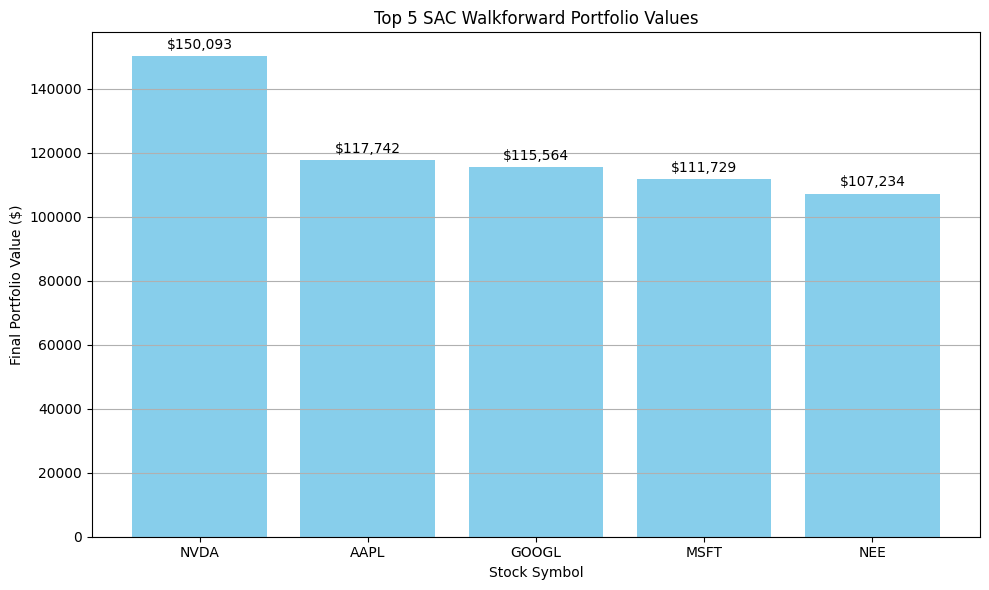

In [15]:
import os
import gc
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#Load performance summary
summary_path = "sac_performance_summary.csv"
if not os.path.exists(summary_path):
    raise FileNotFoundError("Missing 'sac_performance_summary.csv' – run inference first.")

performance_df = pd.read_csv(summary_path)
global_results = []

initial_balance = 100000

def generate_filename(stock, model="sac", version="v2", ext="json", use_date=True):
    date_str = datetime.now().strftime("%Y-%m-%d") if use_date else ""
    return f"{stock}_{model}_{version}{'_' + date_str if use_date else ''}.{ext}"

def save_results(stock, final_value, cumulative_return, sharpe, drawdown, trade_log, version="v2"):
    #Save JSON summary
    json_path = generate_filename(stock, "sac", version, "json")
    with open(json_path, "w") as f:
        json.dump({
            "model_name": "SAC",
            "final_value": final_value,
            "cumulative_return": cumulative_return,
            "sharpe_ratio": sharpe,
            "max_drawdown": drawdown,
            "trade_log": trade_log[:10]  #Preview
        }, f, indent=2)

    #Save trade log
    csv_path = generate_filename(stock, "sac", version, "csv")
    pd.DataFrame(trade_log, columns=["Trade Signal"]).to_csv(csv_path, index=False)
    print(f"Saved {stock} → JSON: {json_path}, CSV: {csv_path}")

def run_evaluation(stock):
    result_path = f"sac_results_{stock}.csv"
    if not os.path.exists(result_path):
        print(f"Missing result CSV for {stock}")
        return

    df = pd.read_csv(result_path)
    if "SAC_Trade_Signal" not in df.columns:
        print(f"No trade signal column in {result_path}")
        return

    df = df.sort_values('Datetime').reset_index(drop=True)
    trade_log = df["SAC_Trade_Signal"].tolist()

    # No more iloc[50:] slice — walkforward already aligned
    df = df.reset_index(drop=True)
    trade_log = trade_log[:len(df)]  # align lengths

    #Backtest strategy
    balance, position = initial_balance, 0
    portfolio = []

    for i, trade in enumerate(trade_log):
        price = df['Close'].iloc[i]
        if trade == "BUY" and position == 0:
            position = balance / price
            balance = 0
        elif trade == "SELL" and position > 0:
            balance = position * price
            position = 0
        portfolio.append(balance if balance > 0 else position * price)

    if not portfolio:
        print(f"⚠ No trades or portfolio entries for {stock}")
        return

    #Metrics
    final_value = portfolio[-1]
    hold_value = (initial_balance / df['Close'].iloc[0]) * df['Close'].iloc[-1]
    returns = pd.Series(portfolio).pct_change().fillna(0)
    sharpe = (returns.mean() / returns.std()) * np.sqrt(252) if returns.std() != 0 else 0
    drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100
    cumulative = ((final_value / initial_balance) - 1) * 100
    winner = "SAC" if final_value > hold_value else "Buy & Hold"

    #Plot with proper Date Axis
    try:
        aligned_dates = pd.to_datetime(df['Datetime']).values

        plt.figure(figsize=(12, 6))
        plt.plot(aligned_dates, df['Close'].values, label='Close Price', alpha=0.4)
        plt.plot(aligned_dates, portfolio, label='SAC Portfolio Value', color="orange")
        plt.title(f"{stock} SAC Trading Strategy (Walkforward Test)")
        plt.xlabel("Date")
        plt.ylabel("Portfolio Value ($)")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.savefig(f"{stock}_sac_portfolio_plot.png")
        plt.close()
        print(f"Plot saved: {stock}_sac_portfolio_plot.png")
    except Exception as e:
        print(f"⚠ Plot failed for {stock}: {e}")

    #Save all
    save_results(stock, final_value, cumulative, sharpe, drawdown, trade_log)
    global_results.append({
        "Symbol": stock,
        "SAC_Portfolio_Value": round(final_value, 2),
        "Buy_Hold_Value": round(hold_value, 2),
        "Cumulative_Return_%": round(cumulative, 2),
        "Sharpe": round(sharpe, 4),
        "Max_Drawdown_%": round(drawdown, 2),
        "Winner": winner
    })

#Loop through all symbols
for stock in performance_df["Symbol"]:
    print(f"\nEvaluating {stock}...")
    run_evaluation(stock)
    gc.collect()

#Save final summary
summary_df = pd.DataFrame(global_results)
summary_df.to_csv("sac_strategy_evaluation_summary.csv", index=False)
print("\n✅ All evaluations completed and saved to: sac_strategy_evaluation_summary.csv")

# Final plot
import matplotlib.pyplot as plt

summary_df = pd.read_csv("sac_strategy_evaluation_summary.csv")
top_performers = summary_df.sort_values(by="SAC_Portfolio_Value", ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_performers["Symbol"], top_performers["SAC_Portfolio_Value"], color='skyblue')
plt.title("Top 5 SAC Walkforward Portfolio Values")
plt.ylabel("Final Portfolio Value ($)")
plt.xlabel("Stock Symbol")
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f"${height:,.0f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



Top 5 SAC Strategy Performers:
  Symbol  SAC_Portfolio_Value  Cumulative_Return_%  Sharpe  Max_Drawdown_%
3   NVDA            150092.53                50.09  2.0155            9.58
0   AAPL            117741.95                17.74  1.3657            5.41
2  GOOGL            115564.29                15.56  1.1478            5.49
1   MSFT            111728.86                11.73  1.3477            6.17
4    NEE            107233.97                 7.23  0.7121           11.53


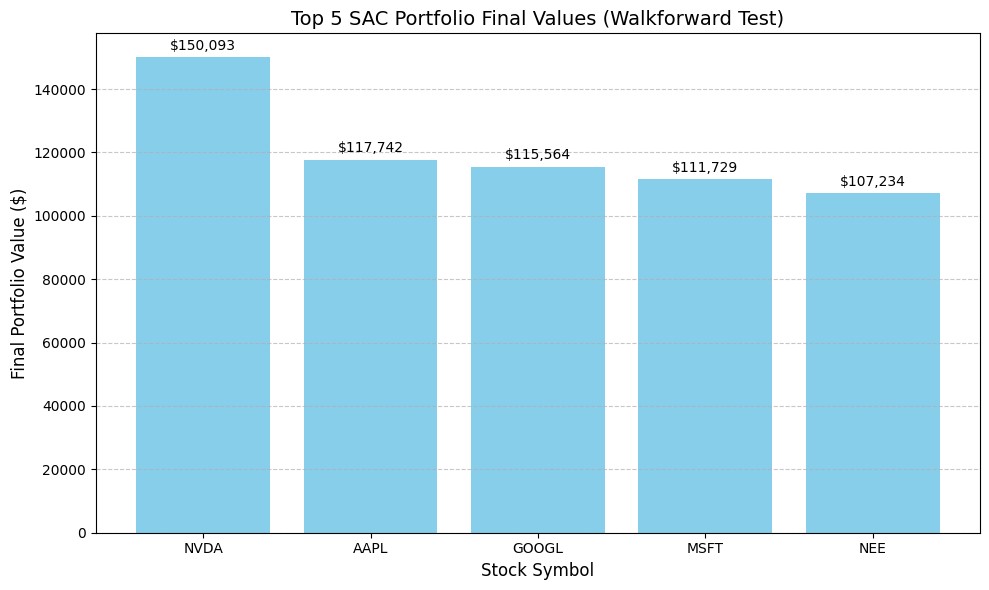

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load evaluation results
summary_df = pd.read_csv("sac_strategy_evaluation_summary.csv")

# Get top 5 performers
top_performers = summary_df.sort_values(by="SAC_Portfolio_Value", ascending=False).head(5)
print("\nTop 5 SAC Strategy Performers:")
print(top_performers[["Symbol", "SAC_Portfolio_Value", "Cumulative_Return_%", "Sharpe", "Max_Drawdown_%"]])

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(top_performers["Symbol"], top_performers["SAC_Portfolio_Value"], color='skyblue')
plt.title("Top 5 SAC Portfolio Final Values (Walkforward Test)", fontsize=14)
plt.ylabel("Final Portfolio Value ($)", fontsize=12)
plt.xlabel("Stock Symbol", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"${height:,.0f}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
#Free GPU Memory Before Training
gc.collect()
torch.cuda.empty_cache()